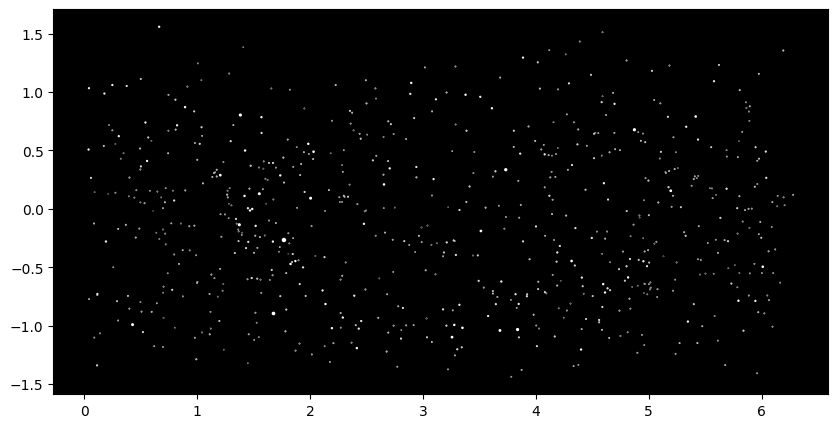

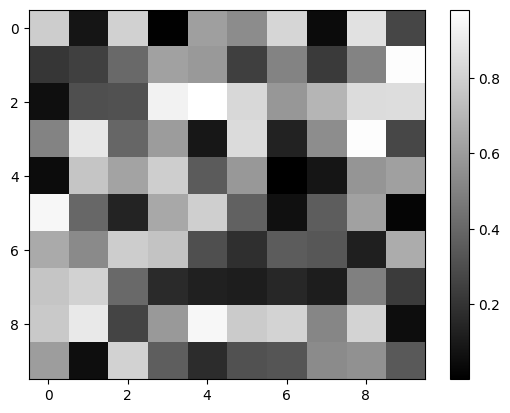

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd

df=pd.read_csv('hip_constellation_line_star.csv')
droplist=['a','b','c','d','e','f']
#print(df.head())

for i in droplist:
    df=df.drop(i,axis=1)

#print(df.head())
for index in list(df.columns):
    if index=='赤緯（符号）':
        pm=list(df[index])
        pm=[-1 if x ==0 else 1 for x in pm]
        df[index]=pm
    elif index in ('経秒','秒緯','等級'):
        df[index]=df[index].astype(float)
    else:
        df[index]=df[index].astype(int)


df['経度（度）']=(df['赤経（時）']+df['分経']/60+df['秒経']/3600)*15
df['緯度（度）']=-1*((df['度緯']+df['分緯']/60+df['秒緯']/3600)-90) #北を0南を180

latitude=df['緯度（度）'].values
longitude=df['経度（度）'].values
lum=df['等級'].values

df2=pd.read_csv('hip_constellation_line.csv')
for i in ['dot1','dot2']:
    df2[i]=df2[i].astype(int)
dot1=df2['dot1'].values
dot2=df2['dot2'].values
dots=list(df2['dot1'].values)
cnt=len(dots)
dots.extend(list(df2['dot2'].values))
dots=set(dots)

c_table={}

for i in dots:
    index = df.loc[df['HIP番号'] == i].index[0]
    c_table[i]=index

size=7*np.exp(-1*(lum+2)*np.log(2))
r=1 #半径
x=r*np.pi*longitude/180
y=r*np.pi*(-1*latitude+90)/180
fig, ax = plt.subplots(figsize=(10,5))

ax.patch.set_facecolor('black')

ax.scatter(x,y,s=size,color='white')


plt.show()
# サンプルの行列を作成
matrix = np.random.rand(10, 10)  # 0から1のランダムな値を持つ10x10の行列

# カスタムカラーマップを作成
colors = [(0, 0, 0), (1, 1, 1)]  # 黒から白へのグラデーション
n_bins = 256  # グラデーションの分割数
cmap_name = 'custom_cmap'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# 行列を画像に変換
plt.imshow(matrix, cmap=cm, aspect='auto')
plt.colorbar()
plt.show()